**if you get an error while loading the dataframe, encode it in 'utf-8'. (put encoding=utf-8, ascii may not work always)**

**%matplotlib inline gives the plotting library permission to draw diagrams right in the notebook instead of popping an image viewer.**

**%%time gives the runtime of the cell. It's a Special. Specials are liitle codes you put at the top of an Ipython Cell beginning with %%**


In [5]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 822 ms


In [6]:
# load the cast dataset
# index_col implies, 'should we use any column as index?' we don't want to, in this case

cast = pd.read_csv('data/cast.csv', index_col=None)

In [7]:
# load the release dates dataset
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

In [8]:
# let's create a dataset of titles and their year of release from the cast dataset

# since cast has duplicates(both actor and actresse in the same movie), we need to drop duplicates 
# when creating the titles dataset

# NOTICE cast[["title", "year"]].drop_duplicates
# It drops the row only if BOTH title and year are repeated
# this makes sense because movies with same title released in same year would be same and are not required

titles = cast[["title", "year"]].drop_duplicates().reset_index(drop=True)

In [9]:
# notice how it doesn't show all the 2lakh rows (the browser will crash if it did)
# that's the beauty of a professional library

titles

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015
5,Straight Outta Compton,2015
6,For Thy Love 2,2009
7,"Lapis, Ballpen at Diploma, a True to Life Journey",2014
8,Desire (III),2014
9,When the Man Went South,2014


In [10]:
# a convenient way to take a look at the dataframe is by the use of head and tail

# show the head
# pass how many values you want to see as the argument (the default is 5)
cast.head() # shows first 5 values

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


**.head() and .tail() are real genuine data slicing operations of a dataframe. It doesn't just "show" you the first 5 rows or the last five. It builds new dataframes and return it. You can even store the head and tail in a new dataframe**

In [11]:
# show the tail
t = cast.tail(6) # shows bottom 10 values
t

,title,year,name,type,character,n
3786170,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0
3786175,Bye Bye Blue Bird,1999,Rosa ? R?gvu,actress,Pensionatv?rtinde,NaN


Always keep some blank cells at the bottom. Otherwise the browser will always move up as it doesn't want you to hit the bottom of the window when you run a cell

You can also use ctrl + enter to run a cell. using shift+enter moves to the next cell as soon as a cell is executed, But ctrl + enter doesn't. It stays on the same cell.

**Every column in a dataframe is a series.**

In [12]:
# there are two ways you can look up a column in a dataframe and return it as a series

# 1
titles["title"].head()

# 2
# this is like an attribute lookup (hence confusing)
# doesn't work when the column has spaces
# hence not preferred
titles.year.head()

0    2015
1    1985
2    2017
3    2015
4    2015
Name: year, dtype: int64

**The real beauty of series is you can treat it like a numpy array and perform operations.**

In [13]:
# for example
titles["year"].head() + 100 # adds 100 to every single element similar to a numpy array

0    2115
1    2085
2    2117
3    2115
4    2115
Name: year, dtype: int64

In [14]:
# you can also use comparision operators
titles["year"].head() > 2000 # returns a series of boolean values which can be later used for filtration

0     True
1    False
2     True
3     True
4     True
Name: year, dtype: bool

In [15]:
# you can filter your dataframe with a given criterion using the comparision operators
titles[titles["year"]>2000].head()

,title,year
0,Closet Monster,2015
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015
5,Straight Outta Compton,2015


**'and' operator in python first checks whether the argument to it's left is true or false and then moves to the right argument to check it's true or false.When we have multiple true or falses in either of the arguments, the and operator doesn't work. And hence, '&' a bitwise operator is used. '|' is a bitwise 'or'**

In [16]:
# A series cannot give a single true or false. It has multiple true and falses. Hence, 'and' operator cannot be used
titles[(titles["year"]>1990) & (titles["year"]<2000)].head()

,title,year
11,Mixing Nia,1998
17,Mariano Mison... NBI,1997
23,Pelotazo nacional,1993
29,Killing Device,1993
35,Violencia urbana,1996


In [17]:
# get all Macbeth films and sort them
# sort_values() can be used for both series and dataframe
t = titles
t[t["title"]=="Macbeth"].sort_values(by="year")

,title,year
107461,Macbeth,1913
19450,Macbeth,1916
22000,Macbeth,1948
76342,Macbeth,1987
32534,Macbeth,1997
153922,Macbeth,1998
108981,Macbeth,2003
144959,Macbeth,2004
42014,Macbeth,2006
59628,Macbeth,2009


**in pandas, merely evaluating an expression will not change a dataframe**

In [18]:
# for example
x = 10
x + 20
x # returns 10

10

In [19]:
# let's grab all the null values (we use isnull())
# we use notnull() to grab notnull values
h = cast.head()
h[h["n"].isnull()]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [20]:
# let's say we want to find out whether a particular name is present in the movie title. eg 'Hamlet'
# we can define our own function
titles[titles["title"].apply(lambda x: 'Hamlet' in x)]

,title,year
1608,Hamlet,1996
4107,Royal Shakespeare Company: Hamlet,2016
6061,"Hamlet, Prince of Denmark",1997
7013,Hamlet,1921
10492,Hamlet,2009
11605,Hamlet 2,2008
12806,Hamlet,1913
14647,Hamlet,2000
17076,Hamlet: Prince of Denmark,1989
19261,National Theatre Live: Hamlet,2015


**let's say we want to apply the general string methods to our series.
series in itself does not have all the string operations.
but series has a little namespace called 'str' attached with it that does have all the aggregate versions of various string operations.
check documnetation for more info**

In [21]:
t = titles.head()

t["title"].str.len()

# or

t["title"].str.upper()

0          CLOSET MONSTER
1         SUURI ILLUSIONI
2     BATTLE OF THE SEXES
3    SECRET IN THEIR EYES
4              STEVE JOBS
Name: title, dtype: object

In [22]:
# here is another titles dataframe
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Otomo Yoshihide: Music,2005
1,"Tytus, Romek i A'Tomek wsrod zlodziei marzen",2002
2,La isla,1979
3,Juego Siniestro,2017
4,New Age,2016


In [23]:
# value_counts() goes through the series, 
# figures out how many times each value has appeared and pairs with it's frequnecy

t = titles
t.year.value_counts().head()

2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
Name: year, dtype: int64

**The pandas index gives you a means to do quick lookups of data**

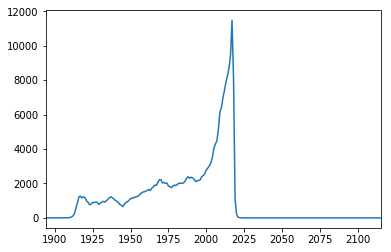

In [24]:
# sort_index() sorts the index

# Let's plot it
# plot() looks at the index and the value to pull out the x and y by default. (you can also specify)

t = titles
t["year"].value_counts().sort_index().plot()

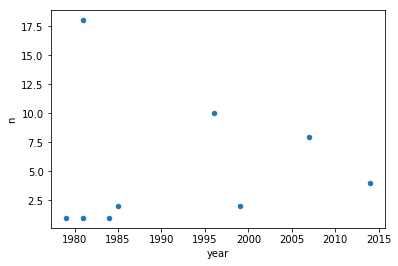

In [25]:
c = cast
c = c[c.character=="Kermit the Frog"]
c.plot(x="year", y="n", kind="scatter")

# interpretation of this plot
# back in the 1980's he used to best and worst roles
# now he gets the average or the middle roles

**The intention of Index is to organize the data and to provide fast access to it. It let's you access the data much more quickly than you would otherwise**

In [26]:
# set_index() is an operation that let's you replace the index with any column

# in this case, title has been transformed into index
t = titles.set_index('title')
t.head()

,year
title,
Otomo Yoshihide: Music,2005
"Tytus, Romek i A'Tomek wsrod zlodziei marzen",2002
La isla,1979
Juego Siniestro,2017
New Age,2016


**.loc() meaning look at a particular location, let's you specify a key [think of it as a dictionary with the index as the key] to return it's value. In a multi-index array, you can use .loc() multiple times till you reach the value specified**

In [27]:
t.loc["Sleuth"]

,year
title,
Sleuth,1972
Sleuth,2007


**Another key thing to remember is, index really helps pandas if it's ordered.**

**Let's compare the speeds before and after sorting**

In [28]:
# Without Sorting
c = cast.set_index("title")

In [29]:
%%time
c.loc["Sleuth"]

Wall time: 1.31 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


In [30]:
# With Sorting
c = cast.set_index("title")
c = c.sort_index()

In [31]:
%%time
c.loc["Sleuth"]

Wall time: 1.01 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0


**As we can see, there is a significant difference**

In [32]:
# you can also set index with multiple levels

c = cast
c = c.set_index(["title", "year"])
c.head()

,,name,type,character,n
title,year,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [33]:
# let's grab the movie Sleuth
# you have to use .loc multiple times for a multiindex array

c.loc["Sleuth"].loc[1972]

,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [34]:
# you can always go back and reset the index

c.reset_index("title") # makes title a column again, and year still remains as an index
c.reset_index("year") # makes year a column again, and title still remains as an index
c.reset_index(["title", "year"]).head() # makes title and year a column back again

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


**Difference between c[c.title=="Sleuth] and c.loc["Sleuth] (after setting title as index and sorting it)**

In the first operation, pandas has to lookup each and every row and generate 4million(Size of the dataset) True and Falses. It basically performs a linear search.

In the Second operation however, pandas performs a binary search which is much faster.

# Groupby

Groupby takes a section of your data and aggregates it to perform operations

Similarly doing groupby returns a groupby object. You must perform an operation on it.

In [35]:
c = cast
c = c[c.name=="George Clooney"]
# Let's create a hierarchical index
# size() is most commonly used. It simply tells you the number of rows
# this returns a series with sorted indices
c.groupby(["title", "year", "character"]).size()
# and then you grab the values of this multi-index series by using .loc()

title                               year  character               
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             

**Remember, Pandas has this bad habit of starting the graph not from zero but from the lowest coordinate to save some space, Hence remember to specify xlim=0 and ylim=0 to get a proper graph.**

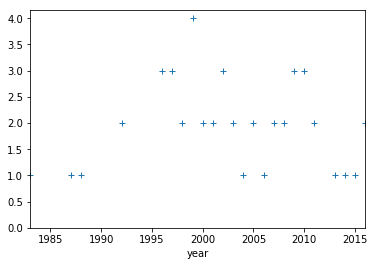

In [36]:
# let's plot a graph of number of movies made by George Clooney over the years
c = cast
c = c[c.name == "George Clooney"]
c.groupby("year").size().plot(ylim=0, style="+")

**Remember, in general, if a pandas method takes in a column name as an argument, then chances are it'll accept more than one columns.**

You can groupby any series that need not even be part of the dataframe, as long as the length is same. see below for example.

In [37]:
# let's say we want to plot a graph of number of movies made by GC over the decades
c=cast
c = c[c.name=="George Clooney"]
c.groupby(c.year//10*10).size()

year
1980     3
1990    14
2000    20
2010    10
dtype: int64

In [38]:
# let's find out the number of actors and actresses by decades
c = cast
c.groupby([c.year//10*10, "type"]).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27605
      actress     15830
1920  actor       48726
      actress     24075
1930  actor      151290
      actress     49972
1940  actor      162364
      actress     51795
1950  actor      157738
      actress     57733
1960  actor      134605
      actress     57744
1970  actor      152811
      actress     66974
1980  actor      197530
      actress     91509
1990  actor      263000
      actress    125040
2000  actor      489468
      actress    263941
2010  actor      747346
      actress    448737
2020  actor         140
      actress       127
2110  actor           2
      actress         1
dtype: int64

In [39]:
# Sometimes we're interested to compare the sizes 
# like comparision between actor and actress in particular decade (say 1890)
# but it's difficult to compare when they're stacked up vertically
# so we use the unstack operation

# let's make a comparision between kermit the frog and oscar the grouch
c = cast
;


c = c[(c.character=="Kermit the Frog")|(c.character =="Oscar the Grouch")]
# let's see how many films they did per decade
c.groupby(["character", c.year//10*10]).size()

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [40]:
# But there is a problem here
# If I want to compare kermits and oscars movies,
# I somehow need to get kermits 1970 beside oscars 1970(say)
# this magnificient operation is called unstack

# So far we talked about dataframe as a whole and index
# But we didn't look at the potential of the columns
# think of columns as the index that runs above

# similar to setindex() and resetindex(), operations on the index that runs on the side
# we have stack() and unstack(), operations on the index that runs on the above

# so basically in unstack, the desired row indices are changed to column indices
# remember this way, the 'u' in unstack points in the upward direction
# the indices move 'upwards'

g = c.groupby(["character", c.year//10*10]).size()
g.unstack(0)

# unstack() by default tackles the innermost index of the dataframe
# you can change it by passing the level of the index as an argument
# you can even pass in the name of index (attribute) as an argument

# Now we have a perfect comparision

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [41]:
# let's stack it back again
# stack let's you grab the column indices and shove it back as row indices
# you can shove the index at any level you want

# if you subtract a number by an NaN value, 
# then the result is also an NaN value
# Hence, before performing operations, we fill the NaN value with 0 (may change as required)

u = g.unstack(0).fillna(0)
u.stack()

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    0.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    0.0
dtype: float64

In [42]:
# unstacking twice reverts it back to the original dataframe
g.unstack("character").unstack("year")
# Reason
# Pandas, by definition should have two indices
# one that runs along the side and one that runs along the top
# if you do unstack twice, then you completely blank out the index along the side
# hence, pandas will not allow you to do that and reverts back
# So, the rule is you will get the series if you move everything up or everything down

character         year
Kermit the Frog   1970    1.0
                  1980    4.0
                  1990    2.0
                  2000    1.0
                  2010    1.0
Oscar the Grouch  1970    NaN
                  1980    2.0
                  1990    1.0
                  2000    1.0
                  2010    NaN
dtype: float64

In [43]:
# let's say we want to unstack twice,
# to move all the indices along rows upwards
# maybe we can create an extra index

df1 = g.unstack(0).fillna(0).copy()
df1["extra index"] = 1

# let's set the extra index as index
# drop=True means it drops the 'extra index' column once it has been set as an index
# append=True means it'll not be replacing the previous index but only appends to it

df1.set_index("extra index", drop=True, append=True).unstack(0)

character   Kermit the Frog                     Oscar the Grouch            \
year                   1970 1980 1990 2000 2010             1970 1980 1990   
extra index                                                                  
1                       1.0  4.0  2.0  1.0  1.0              0.0  2.0  1.0   

character              
year        2000 2010  
extra index            
1            1.0  0.0

**Whenever you use the plot() method on the dataframe, remember that the index along the side will be the X-Axis and the index along the Above will be the Y-Axis.**

In [44]:
# date time analysis

# similar to a str namespace attached to a series,
# pandas has a dt namespace attached to series which is used to parse dates

In [45]:
release_dates = pd.read_csv('data/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [46]:
# merge

# let's look at an example
# let's merge ellen pages' movies with their release dates
c = cast
c = c[c["name"]=="Ellen Page"]
r = release_dates
c.merge(r).head()

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08


In [47]:
# so how does this work
# first, merge checks the common columns in both the dataframes
# and then it merges on them
# you can specify on what columns to merge and pass it as an argument

# merge is very old and is most commonly used
# use merge wherever possible
# first be very familiarized with merge, and only then learn join

In [48]:
# pivot

# let's look at the star wars episodes released in countries with name u
r = release_dates.copy()
r = r[r.title.str.startswith("Star Wars: Episode")]
r = r[r.country.str.startswith("U")]
r

,title,year,country,date
344013,Star Wars: Episode I - The Phantom Menace,1999,USA,1999-05-19
344034,Star Wars: Episode I - The Phantom Menace,1999,Uruguay,1999-07-02
344043,Star Wars: Episode I - The Phantom Menace,1999,UK,1999-07-15
344060,Star Wars: Episode I - The Phantom Menace,1999,United Arab Emirates,1999-08-25
344123,Star Wars: Episode II - Attack of the Clones,2002,UK,2002-05-16
344124,Star Wars: Episode II - Attack of the Clones,2002,USA,2002-05-16
344125,Star Wars: Episode II - Attack of the Clones,2002,United Arab Emirates,2002-05-16
344142,Star Wars: Episode II - Attack of the Clones,2002,Ukraine,2002-06-08
344159,Star Wars: Episode II - Attack of the Clones,2002,Uruguay,2002-07-05
344176,Star Wars: Episode III - Revenge of the Sith,2005,Uruguay,2005-05-18


In [49]:
# pivot
# pivot does a set_index(), a sort_index() and unstack() in order

# let's apply the pivot
r.pivot("title", "country", "date")

# So, it did a set_index() and sort_index() on title | title moves to left
# it did an unstack() on country | country moves to the top
# date is the information | it remains in the center

# you don't need to explicitly learn about pivoting
# if you're good with set_index(), sort_index() and unstack(),
# you can pivoting and much more

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,NaT,2019-12-20,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17
Star Wars: Episode VIII - The Last Jedi,2017-12-14,2017-12-15,2017-12-14,NaT,2017-12-14


In [50]:
# to check if a word contains in a string in the str namespace, use contains() method

# example
rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd.head()

,title,year,country,date
1237,12 Dog Days of Christmas,2014,USA,2014-11-28
1238,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
2653,2016 Dancing Dolls a Christmas Story,2017,USA,2017-01-15
6180,A Bad Moms Christmas,2017,Canada,2017-11-01
6181,A Bad Moms Christmas,2017,Ireland,2017-11-01


In [51]:
# to check if a string starts with a given word in the str namespace, use startswith() method

# example
rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd.head()

,title,year,country,date
388887,The Hobbit: An Unexpected Journey,2012,Belgium,2012-12-12
388888,The Hobbit: An Unexpected Journey,2012,Denmark,2012-12-12
388889,The Hobbit: An Unexpected Journey,2012,Finland,2012-12-12
388890,The Hobbit: An Unexpected Journey,2012,France,2012-12-12
388891,The Hobbit: An Unexpected Journey,2012,Netherlands,2012-12-12
